In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
# IRIS データの読み込み
iris = load_iris()
columns = ['がく片の長さ','がく片の幅','花片の長さ','花片の幅']
X = pd.DataFrame(iris.data, columns = columns)
X.head()

,がく片の長さ,がく片の幅,花片の長さ,花片の幅
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.data.shape # データ個数×特徴数

(150, 4)

In [4]:
X.loc[0] # 最初のデータ（4次元ベクトル）

がく片の長さ    5.1
がく片の幅     3.5
花片の長さ     1.4
花片の幅      0.2
Name: 0, dtype: float64

In [5]:
y = iris.target # .targetにラベルが入っている

In [6]:
y.shape # データ個数

(150,)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names # ラベルの意味

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

[Iris flower data set @ Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)


|class|image|license|
|------|------|--|
| Iris setosa |<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" width=200> | CC BY-SA 3.0 by Radomil |
|Iris versicolor|<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width=200>|CC BY-SA 3.0 by Danielle Langlois|
|Iris virginica|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/736px-Iris_virginica.jpg" width=200>|CC BY-SA 2.0|

In [9]:
print(iris.DESCR) # データの詳細な記述

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

# 学習器を作って学習させてみよう
その前にデータをシャッフル

In [10]:
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

In [11]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))
train_index, test_index

(array([  3, 149,  98,   6,  68, 109,  96,  12, 102, 120, 104, 128,  46,
         11, 110, 124,  41, 148,   1, 113, 139,  42,   4, 129,  17,  38,
          5,  53, 143, 105,   0,  34,  28,  55,  75,  35,  23,  74,  31,
        118,  57, 131,  65,  32, 138,  14, 122,  19,  29, 130,  49, 136,
         99,  82,  79, 115, 145,  72,  77,  25,  81, 140, 142,  39,  58,
         88,  70,  87,  36,  21,   9, 103,  67, 117,  47]),
 array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
         54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
         44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
         92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
         56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
         89,  91, 125,  48,  13, 111,  95,  20,  15,  52]))

In [12]:
X_train, X_test = X.iloc[train_index], X.iloc[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル
y_train,y_test

(array([0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
        2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0,
        2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0,
        0, 0, 2, 1, 2, 0]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
        0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
        0, 2, 1, 0, 0, 1]))

# シャッフルされて偏りがないことに注意せよ

# 線型回帰識別器

In [13]:
# 線形モデルを準備
from sklearn import linear_model
# 識別器を作成
clf = linear_model.LogisticRegression()

In [14]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
clf.fit(X_train, y_train); # 識別器の学習

In [16]:
print(clf.score(X_train, y_train)) # 学習データの精度

0.92


In [17]:
print(clf.score(X_test, y_test)) # テストデータの精度

0.84


１回だけではたまたまの結果なのかもしれないので、１０回試してみる

In [18]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[ 0.84        0.93333333  0.90666667  1.          0.90666667  0.93333333
  0.94666667  1.          0.90666667  0.88      ]


In [19]:
scores.mean() # 正解率の平均値を求める。

0.92533333333333334

In [20]:
scores.std() # 正解率の標準偏差

0.047027178902795737

In [21]:
print("識別実験結果　認識率　{0} +/- {1}".format(scores.mean(), scores.std()))

識別実験結果　認識率　0.9253333333333333 +/- 0.04702717890279574


In [22]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

# 学習データの分量を0.1, 0.2, ..., 0.9と変えて実験してみる


In [23]:
train_sizes = np.arange(0.1, 1.0, 0.1)

In [24]:
all_mean = []
all_std  = []

for train_size in train_sizes: #  ループを回る毎に学習に用いる割合を増やして繰り返す

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,     
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 74.85 +/- 10.43 %
train_size 20%: 83.51 +/- 9.76 %
train_size 30%: 87.97 +/- 7.23 %
train_size 40%: 91.38 +/- 5.33 %
train_size 50%: 92.97 +/- 4.16 %
train_size 60%: 93.88 +/- 3.81 %
train_size 70%: 94.91 +/- 3.26 %
train_size 80%: 94.93 +/- 4.26 %
train_size 90%: 95.00 +/- 5.69 %


# グラフ化する

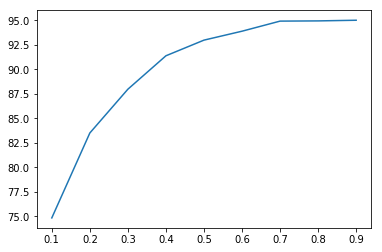

In [25]:
plt.plot(train_sizes, all_mean) #  学習データの割合に対する平均認識率

(0, 1)

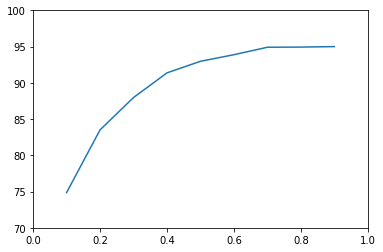

In [26]:
plt.plot(train_sizes, all_mean)  #  学習データの割合に対する平均認識率
plt.ylim(70,100)
plt.xlim(0,1)

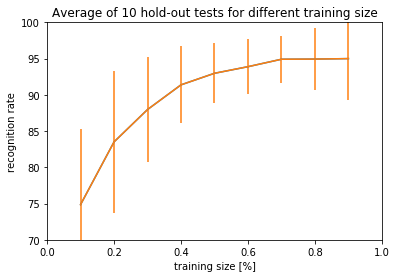

In [27]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")

# 課題
ML00 で出てきた他の識別器を使って同じ実験を試し、識別性能を比較せよ。

In [28]:
from sklearn import svm
# オブジェクト作成
clf = svm.LinearSVC(C=1)
clf = svm.LinearSVC(C=1)
